# Example of interactive use

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
import numpy as np

from ramp_rate_script import process_subset
from ramprate.load_dataset import load_epa_crosswalk, load_epacems
from ramprate.visualize import plot_component_max_ramp

In [4]:
pd.options.display.max_rows = 50

In [5]:
states = ['FL'] # for all states, set to None
years = [2016] # for all years, set to None
# the default value for columns picks an appropriate subset
# columns = <subset> # for all columns, set to None
cems = load_epacems(states=states, years=years, )
cems.set_index(
            ["unit_id_epa", "operating_datetime_utc"],
            drop=False,
            inplace=True,
        )
cems.sort_index(inplace=True)

In [6]:
crosswalk = load_epa_crosswalk()

In [7]:
outputs = process_subset(cems, crosswalk)

## Visualize an individual component

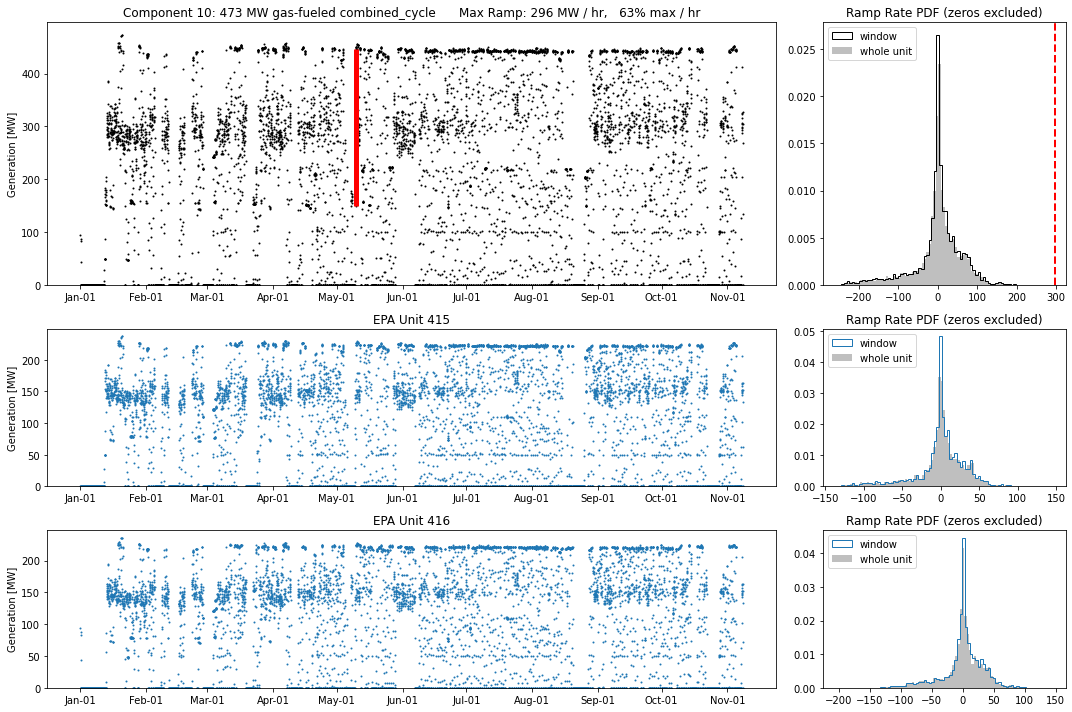

In [8]:
plot_component_max_ramp(component_id=10, window_hours=8760, cdf=False, **outputs)

### Same as above but zoomed in (small window size)

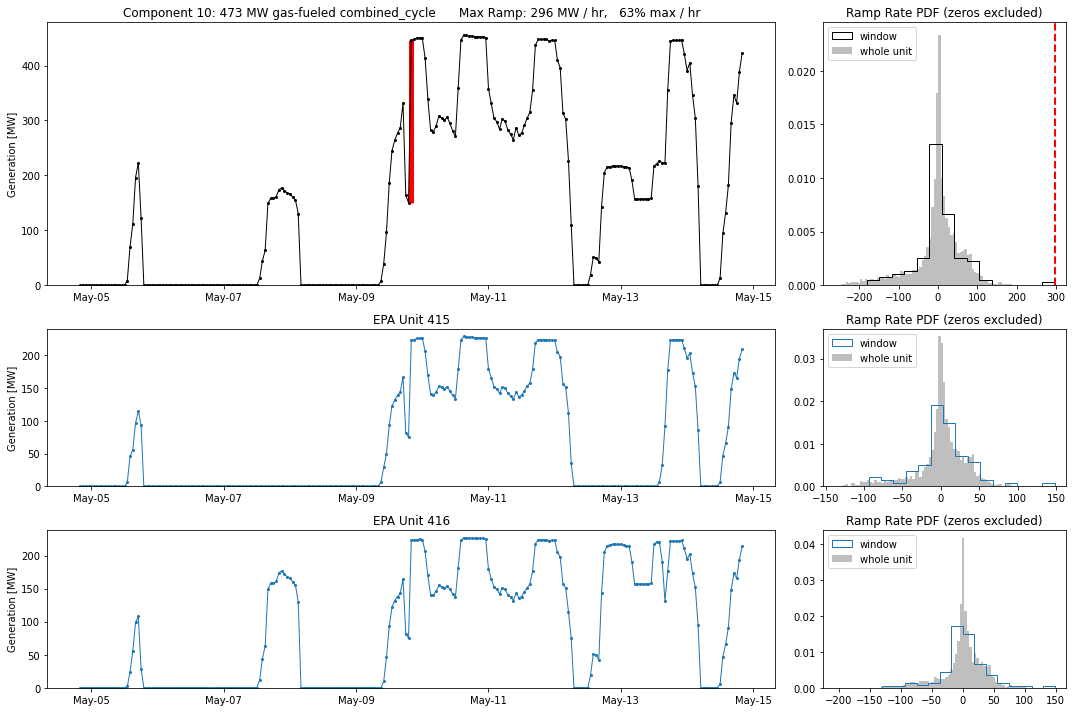

In [9]:
plot_component_max_ramp(component_id=10, window_hours=10*24, cdf=False, **outputs)

## Show what the outputs look like

In [10]:
item = iter(outputs.items())

In [11]:
k, v = next(item)
print(f"{k} has shape {v.shape}")
v.sample(3)

component_aggs has shape (233, 18)


,sum_of_max_gross_load_mw,max_of_sum_gross_load_mw,max_ramp,min_ramp,idxmax_ramp,idxmin_ramp,max_abs_ramp,idxmax_abs_ramp,EIA_UNIT_TYPE,capacity_CAMD,capacity_EIA,simple_CAMD_FUEL_TYPE_via_capacity,simple_EIA_FUEL_TYPE_via_capacity,simple_EIA_UNIT_TYPE,ramp_factor_CAMD,ramp_factor_EIA,ramp_factor_sum_max,ramp_factor_max_sum
component_id,,,,,,,,,,,,,,,,,,
118,60.0,60.0,53.0,-50.0,2016-01-05 10:00:00+00:00,2016-12-20 01:00:00+00:00,53.0,2016-01-05 10:00:00+00:00,(GT),120.0,62.0,gas,gas,gas_turbine,0.441667,0.854839,0.883333,0.883333
47,164.0,164.0,50.0,-96.0,2016-09-07 21:00:00+00:00,2016-01-11 18:00:00+00:00,96.0,2016-01-11 18:00:00+00:00,"(CT, CA)",160.0,270.1,gas,gas,combined_cycle,0.600000,0.355424,0.585366,0.585366
15,478.0,478.0,250.0,-250.0,2016-09-16 09:00:00+00:00,2016-06-30 23:00:00+00:00,250.0,2016-09-16 09:00:00+00:00,(ST),523.8,523.8,coal,coal,steam_turbine,0.477281,0.477281,0.523013,0.523013


In [12]:
k, v = next(item)
print(f"{k} has shape {v.shape}")
v.sample(3)

key_map has shape (433, 39)


,component_id,plant_id_eia,unitid,unit_id_epa,SEQUENCE_NUMBER,CAMD_STATE,CAMD_FACILITY_NAME,CAMD_PLANT_ID,CAMD_UNIT_ID,CAMD_GENERATOR_ID,...,EIA_RETIRE_YEAR,PLANT_ID_CHANGE_FLAG,MOD_EIA_PLANT_ID,MOD_EIA_BOILER_ID,MOD_EIA_GENERATOR_ID_BOILER,MOD_EIA_GENERATOR_ID_GEN,MATCH_TYPE_GEN,MATCH_TYPE_BOILER,simple_CAMD_FUEL_TYPE,simple_EIA_FUEL_TYPE
62,25,643,1,465,539.0,FL,Lansing Smith Generating Plant,643,1,1,...,2016.0,0.0,643.0,1,1,1,3_1_Generator (generators) match on plant and ...,6_1_EnviroAssoc (boilers and generators) match...,coal,coal
165,83,54365,1,3762,4268.0,FL,Orange Cogeneration Facility,54365,1,APC3,...,0.0,0.0,54365.0,1,3,APC3,3_1_Generator (generators) match on plant and ...,6_1_EnviroAssoc (boilers and generators) match...,gas,gas
320,63,7242,**5,90101,3064.0,FL,Polk,7242,**5,5,...,0.0,0.0,7242.0,NaN,NaN,5,3_1_Generator (generators) match on plant and ...,NaN,gas,gas


In [13]:
k, v = next(item)
print(f"{k} has shape {v.shape}")
v.sample(3)

component_timeseries has shape (1800672, 3)


,,gross_load_mw,exclude_ramp,ramp
component_id,operating_datetime_utc,,,
59,2016-03-13 12:00:00+00:00,0.0,False,0.0
223,2016-01-02 05:00:00+00:00,0.0,False,0.0
188,2016-05-01 00:00:00+00:00,0.0,False,0.0


In [14]:
k, v = next(item)
print(f"{k} has shape {v.shape}")
v.sample(3)

cems has shape (2573664, 11)


,,plant_id_eia,unitid,operating_datetime_utc,gross_load_mw,unit_id_epa,hours_from_startup,hours_to_shutdown,hours_distance,component_id,simple_EIA_UNIT_TYPE,exclude_ramp
unit_id_epa,operating_datetime_utc,,,,,,,,,,,
89894,2016-06-29 00:00:00+00:00,6046,P3,2016-06-29 00:00:00+00:00,0.0,89894,320.0,20.0,20.0,143,gas_turbine,False
89902,2016-05-05 16:00:00+00:00,634,P3,2016-05-05 16:00:00+00:00,0.0,89902,2520.0,312.0,312.0,151,gas_turbine,False
90801,2016-07-13 11:00:00+00:00,609,CCCT3A,2016-07-13 11:00:00+00:00,232.0,90801,62.0,232.0,62.0,231,combined_cycle,False
